### Instrucciones:
 1. Carga y Exploración de Datos:
    - Cargar el dataset y revisar la estructura básica.
    - Descripción de las variables y su distribución.
    - Detección y tratamiento de valores nulos.
    - Identificación y tratamiento de outliers.
    - Análisis de correlación entre variables.
 2. Preprocesamiento:
    - Selección de características importantes.
    - Transformación de variables categóricas.
    - División del conjunto de datos en entrenamiento y prueba.
    - Escalado de características.
 3. Regresión Lineal:
    - Entrenamiento del modelo.
    - Evaluación del rendimiento (MSE y R²).
4. K-Nearest Neighbors (KNN):
    - Entrenamiento del modelo.
    - Evaluación del rendimiento (MSE y R²).
 5. Árbol de Decisión:
    - Entrenamiento del modelo.
    - Evaluación del rendimiento (MSE y R²).
 6. Comparación de Modelos:
    - Comparar los resultados de los tres modelos en términos de MSE y R².
    - Discusión sobre las diferencias en el rendimiento de los modelos.
 7. Interpretación de Resultados:
    - Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
    - Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
 8. Desafíos Adicionales:
    - Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
    - Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
    - Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
#### Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Cargar los datos
df = pd.read_csv('../data/Automobile_data.csv')

# Exploración básica de los datos
print("Primeras filas del dataset:")
print(df.head())
print("\nDescripción de las columnas:")
print(df.info())
print("\nDescripción estadística:")
print(df.describe())

### Paso 2: Detección y Tratamiento de Valores Nulos
Verificamos y tratamos los valores nulos, y luego identificamos posibles outliers y relaciones entre las variables.


Valores nulos por columna:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Estructura de datos después de la conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Columns: 266 entries, symboling to peak-rpm_?
dtypes: bool(255), float64(6), int64(5)
memory usage: 68.9 KB
None


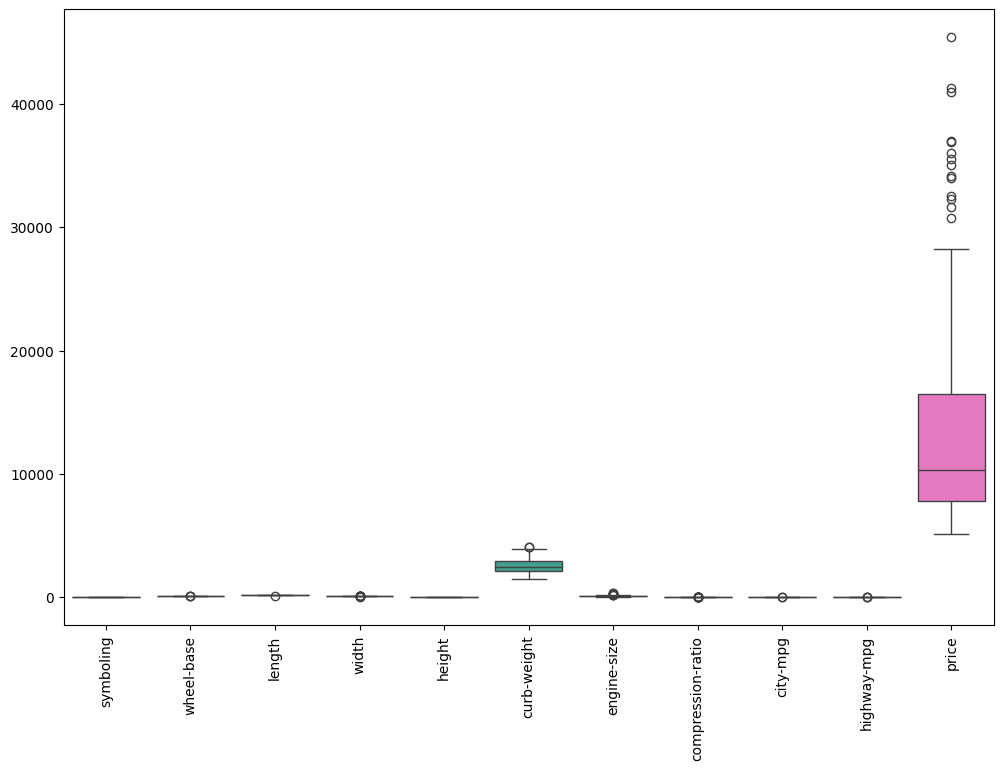

In [2]:
# Revisamos valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Convertir la columna 'price' a valores numéricos, convirtiendo los valores no numéricos en NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Ahora podemos llenar los valores NaN en 'price' si es necesario, o eliminarlos
df = df.dropna(subset=['price'])

# Convertir a dummies las columnas categóricas
df = pd.get_dummies(df, drop_first=True)

# Eliminamos o imputamos valores nulos (aquí los eliminamos como ejemplo)
df = df.dropna()

# Transformación de variables categóricas en variables dummies
df = pd.get_dummies(df, drop_first=True)

# Verificamos nuevamente si quedan valores no numéricos
print("\nEstructura de datos después de la conversión:")
print(df.info())

# Identificación de outliers usando boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

# # Análisis de correlación
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Matriz de correlación")
# plt.show()


### Paso 3: Preprocesamiento de Datos
Aquí seleccionaremos las características importantes y transformaremos variables categóricas si existen.

In [4]:
# Selección de características y transformación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Separación en características (X) y variable objetivo (y)
X = df.drop('price', axis=1)  # Asegúrate de usar el nombre correcto
y = df['price']

# División de datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Paso 4: Modelos de Regresión
Regresión Lineal

In [5]:
# Modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nRegresión Lineal - MSE: {mse_lr}, R²: {r2_lr}")




Regresión Lineal - MSE: 5.835004315332626e+30, R²: -4.769234339665828e+22


In [6]:
# Modelo K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse_knn}, R²: {r2_knn}")


KNN - MSE: 71961210.88585365, R²: 0.41182583673687745


In [7]:
# Modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Árbol de Decisión - MSE: {mse_tree}, R²: {r2_tree}")


Árbol de Decisión - MSE: 11394066.402439024, R²: 0.9068707239647565


### Paso 5: Comparación de Modelos

In [8]:
# Comparación de resultados
print("\nComparación de modelos:")
print(f"Regresión Lineal - MSE: {mse_lr}, R²: {r2_lr}")
print(f"KNN - MSE: {mse_knn}, R²: {r2_knn}")
print(f"Árbol de Decisión - MSE: {mse_tree}, R²: {r2_tree}")



Comparación de modelos:
Regresión Lineal - MSE: 5.835004315332626e+30, R²: -4.769234339665828e+22
KNN - MSE: 71961210.88585365, R²: 0.41182583673687745
Árbol de Decisión - MSE: 11394066.402439024, R²: 0.9068707239647565


### Paso 6: Optimización y Ajuste de Hiperparámetros
Para optimizar KNN y el Árbol de Decisión, usamos GridSearchCV.

In [9]:
# GridSearchCV para KNN
knn_params = {'n_neighbors': range(1, 20)}
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5)
grid_knn.fit(X_train, y_train)
print(f"Mejor parámetro KNN: {grid_knn.best_params_}")

# GridSearchCV para Árbol de Decisión
tree_params = {'max_depth': range(1, 20)}
grid_tree = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5)
grid_tree.fit(X_train, y_train)
print(f"Mejor parámetro Árbol de Decisión: {grid_tree.best_params_}")


Mejor parámetro KNN: {'n_neighbors': 1}
Mejor parámetro Árbol de Decisión: {'max_depth': 7}
